# Building and implementing a neural network from scratch in Python
By [Zahra Taheri](https://github.com/zahta), October 18, 2020

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A Feedforward neural network with 3 layers
- ReLU and Sigmoid activation functions
- MSE Loss

In [2]:
input_dim = 12
output_dim = 1
hidden_dim1 = 100
hidden_dim2 = 100
learning_rate = 0.0001
n_iters = 10

In [3]:
class ThreeLayersFNN():

    def __init__(self, layers=[input_dim, hidden_dim1, hidden_dim2, output_dim], lr=learning_rate, iters=n_iters):
        self.parameters = {}
        self.loss = []
        self.layers = layers
        self.lr = lr
        self.iters = iters
        self.sample_size = None
        self.X = None
        self.y = None   
        
 

    def initialize_weights(self):       
        ''' 
        Random weights and biases for different layers
        '''
        # seed for random number generation
        np.random.seed(42)      
        '''
        Hidden Layer 1
        '''
        self.parameters['W1_1'] = 0.10 * np.random.random((self.layers[0], self.layers[1]))
        self.parameters['b1_1'] = 0.010 * np.ones((self.layers[1],))
        self.parameters['W2_1'] = 0.10 * np.random.random((self.layers[1],self.layers[2]))
        self.parameters['b2_1'] = 0.010 * np.ones((self.layers[2],))
        '''
        Hidden Layer 2
        ''' 
        self.parameters['W1_2'] = 0.10 * np.random.random((self.layers[2], self.layers[3]))
        self.parameters['b1_2'] = 0.010 * np.ones((self.layers[3],))

        
        
    def relu(self, z):
        '''
        ReLU activation function
        '''
        return np.maximum(0, z)
   

        
    def sigmoid(self, z):
        '''
        Sigmoid activation function
        '''
        return 1.0/(1.0 + np.exp(-z))
    
    
    
    def sigmoid_der(self, z):
        '''
        Derivative of Sigmoid activation function
        '''
        return self.sigmoid(z) *(1.0 - self.sigmoid (z))
    
    
    
    def relu_der(self, z):
        '''
        Derivative of ReLU activation function
        '''
        z[z<=0] = 0
        z[z>0] = 1
        return z
    
    
    
    def mse_loss(self, y, yhat):
        '''
        Mean square error loss
        '''
        error = ((1/2) * (np.power((y - yhat), 2)))
        loss = error.sum()
        return loss
    
    
    
    #def crossentropy_loss(self, y, yhat):
    #    '''
    #    Cross entropy loss
    #    '''
    #    nsample = len(y)
    #    loss = -(1 / nsample) * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((1 - y), np.log(1 - yhat))))
    #    return loss
    
    
    
    def feedforward(self):
        '''
        Forward propagation
        '''
        Z1 = np.dot(self.X, self.parameters['W1_1']) + self.parameters['b1_1']
        A1 = self.relu(Z1)
        Z2 = np.dot(A1, self.parameters['W2_1']) + self.parameters['b2_1']
        A2 = self.relu(Z2)
        print(A2)
        Z3 = np.dot(A2, self.parameters['W1_2']) + self.parameters['b1_2']
        yhat = self.relu(Z3)
        loss = self.mse_loss(self.y, yhat)
        
        # save new parameters     
        self.parameters['Z1'] = Z1
        self.parameters['Z2'] = Z2
        self.parameters['Z3'] = Z3
        self.parameters['A1'] = A1
        self.parameters['A2'] = A2
        
        return yhat,loss
        
        
        
    def backpropagation(self, yhat):  
        '''
        Back propagation
        '''
        # application of the chain rule to find derivative of the loss function with respect to the parameters    
        
        #dloss_dyhat = self.y - yhat
        #dloss_dW1_2 = np.dot(self.parameters['A2'].T, dloss_dyhat)
        #dloss_db1_2 = np.sum(dloss_dyhat, axis=0)   
        #dloss_db1_2 = np.dot(dloss_dyhat, np.ones((1,)))
        #print(dloss_db1_2)
        
        
        dloss_dyhat = self.y - yhat
        dloss_dZ3 = dloss_dyhat * self.relu_der(self.parameters['Z3'])
        print(self.relu_der(self.parameters['Z3']))
        dloss_dW1_2 = np.dot(self.parameters['A2'].T, dloss_dZ3)
        dloss_db1_2 = np.sum(dloss_dZ3, axis=0)
        
        dloss_dA2 = np.dot(dloss_dyhat, self.parameters['W1_2'].T)
        #print("self.relu_der(self.parameters['Z2']", self.relu_der(self.parameters['Z2']))
        dloss_dZ2 = dloss_dA2 * self.relu_der(self.parameters['Z2'])
        dloss_dW2_1 = np.dot(self.parameters['A1'].T, dloss_dZ2)
        dloss_db2_1 = np.sum(dloss_dZ2, axis=0)
        
        dloss_dA1 = np.dot(dloss_dZ2, self.parameters['W2_1'].T)
        #print("self.relu_der(self.parameters['Z1']", self.relu_der(self.parameters['Z1']))
        dloss_dZ1 = dloss_dA1 * self.relu_der(self.parameters['Z1'])
        dloss_dW1_1 = np.dot(self.X.T, dloss_dZ1)
        dloss_db1_1 = np.sum(dloss_dZ1, axis=0)
        #print("dloss_dyhat",dloss_dyhat, "dloss_dW1_2", dloss_dW1_2)
        #print("dloss_dA2", dloss_dA2, "dloss_dZ2",dloss_dZ2,"dloss_dW2_1", dloss_dW2_1, "dloss_db2_1", dloss_db2_1)
        #print("dloss_dA1", dloss_dA1, "dloss_dZ1",dloss_dZ1,"dloss_dW1_1", dloss_dW1_1, "dloss_db1_1", dloss_db1_1)
        
        # update weights and biases with the derivatives of loss function
        self.parameters['W1_1'] = self.parameters['W1_1'] - self.lr * dloss_dW1_1
        self.parameters['b1_1'] -= self.lr * dloss_db1_1
        self.parameters['W2_1'] -= self.lr * dloss_dW2_1
        self.parameters['b2_1'] -= self.lr * dloss_db2_1
        self.parameters['W1_2'] -= self.lr * dloss_dW1_2
        #self.parameters['b1_2'] -= self.lr * dloss_db1_2

   

    def fit(self, X, y):
        '''
        Train the neural network (using training set and labels)
        '''
        self.X = X
        self.y = y
        self.initialize_weights() 

        for i in range(self.iters):
            yhat, loss = self.feedforward()
            self.backpropagation(yhat)
            self.loss.append(loss)
            print(loss)
            
    
    
    def predict(self, X_test):
        '''
        Test the neural network (using test set and labels)
        '''
        Z1 = np.dot(self.X, self.parameters['W1_1']) + self.parameters['b1_1']
        A1 = self.relu(Z1)
        Z2 = np.dot(A1, self.parameters['W2_1']) + self.parameters['b2_1']
        A2 = self.relu(Z2)
        print(A2)
        Z3 = np.dot(A2, self.parameters['W1_2']) + self.parameters['b1_2']
        y_pred = self.relu(Z3)
        return np.round(y_pred)              

    
                                
    def test_loss(self, y_test, yhat_test):
        '''
        Loss of the test set
        '''
        loss_t = self.mse_loss(y_test, yhat_test)
        return loss_t

    

    #def plot_loss(self):
    #    '''
    #    Plots the loss curve
     #   '''
     #   plt.plot(self.loss)
    #    plt.xlabel("Iteration")
    #    plt.ylabel("MSE")
     #   plt.title("Loss curve for training")
     #   plt.show()

### Dataset: California housing values

### Import libraries

In [4]:
#For some basic operations
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

# to make this notebook's output identical at every run
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [5]:
data=pd.read_csv('housing.csv')
data.shape

(20640, 10)

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Descriptive statistics and data visualizations

In [8]:
#Describe the dataset

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
#Check the no. of unique items in each categorical column

data.select_dtypes('object').nunique()

ocean_proximity    5
dtype: int64

In [10]:
# Percentage of missing data in each column

number_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


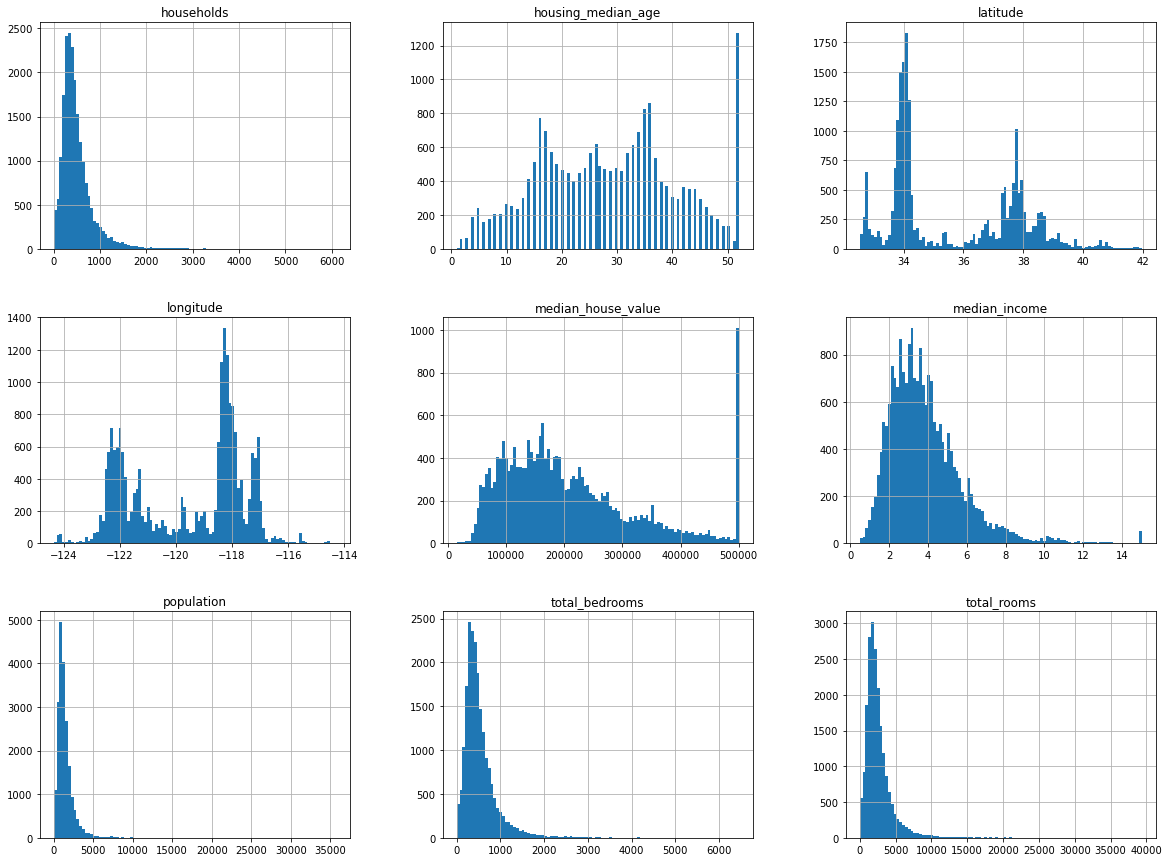

In [11]:
data.hist(bins=100, figsize=(20,15))

plt.show()

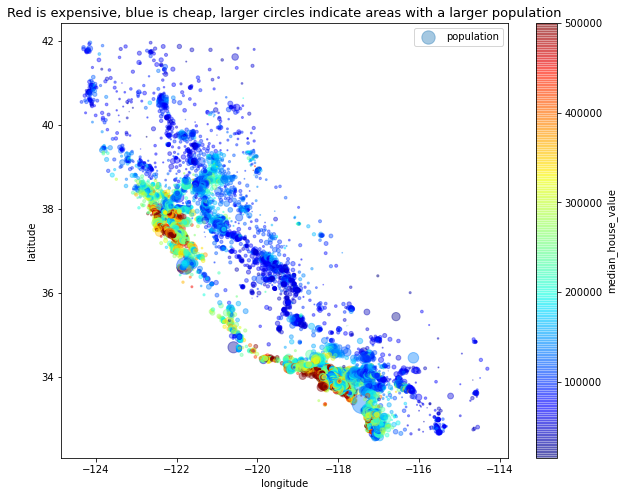

In [12]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,8),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('Red is expensive, blue is cheap, larger circles indicate areas with a larger population',\
          fontweight = 20, fontsize = 13)
plt.legend()

In [13]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [14]:
#from pandas.plotting import scatter_matrix

#attributes = ["median_house_value", "median_income", "total_rooms",
             # "housing_median_age"]
#scatter_matrix(data[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

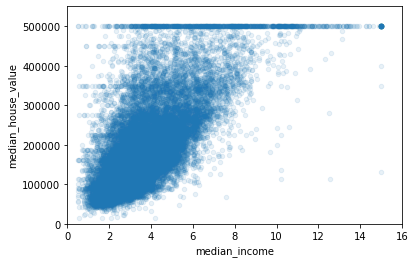

In [15]:
data.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

## Data Cleaning and Preparation

In [16]:
#Fill in missing values with median

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [17]:
#Remove the text attribute because median can only be calculated on numerical attributes:
data_num=data.drop("ocean_proximity", axis=1)

In [18]:
imputer.fit(data_num)
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [19]:
X = imputer.transform(data_num)
data_num_clean = pd.DataFrame(X, columns=data_num.columns,index=data_num.index)
data_num_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [20]:
data_num_clean["rooms_per_household"] = data_num_clean["total_rooms"]/data_num_clean["households"]
data_num_clean["bedrooms_per_room"] = data_num_clean["total_bedrooms"]/data_num_clean["total_rooms"]
data_num_clean["population_per_household"]=data_num_clean["population"]/data_num_clean["households"]

In [21]:
#Preprocess the categorical input feature, `ocean_proximity`:
data_cat = data[["ocean_proximity"]]

In [22]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)

In [23]:
#ordinal_encoder.categories_

In [24]:
data_num_clean["ocean_proximity"]=data_cat_encoded
data_clean=data_num_clean
data_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,3.0


In [25]:
housing_labels = data_clean["median_house_value"]
data_clean = data_clean.drop("median_house_value", axis=1)
data_clean["median_house_value"] = housing_labels
data_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,3.0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,3.0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,3.0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,3.0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,3.0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625,2.560606,1.0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208,3.122807,1.0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173,2.325635,1.0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892,2.123209,1.0,84700.0


In [26]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler()
X_scaled = minmax_scale.fit_transform(data_clean)
X_scaled.shape

(20640, 13)

In [27]:
#Splitting the dependent and independent variables

X = X_scaled[:,:-1]
y = X_scaled[:,-1]

print(X.shape)
print(y.shape)

(20640, 12)
(20640,)


In [28]:
#Splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)

(16512, 12)
(16512,)
(4128, 12)


In [29]:
# Without Normalization of the data

train_data = train_data
test_data = test_data
train_labels = train_labels.reshape(-1,1)
test_labels = test_labels.reshape(-1,1)

In [30]:
train_labels

array([[0.18144461],
       [0.75690616],
       [0.32494918],
       ...,
       [0.42701061],
       [0.55360803],
       [0.63917468]])

### Train the model

In [31]:
nn = ThreeLayersFNN() # create the NN model
#print(train_data[0].reshape(1,-1).shape)
nn.fit(train_data, train_labels) #train the model

[[0.78502533 0.79539183 0.81191966 ... 0.76470073 0.75778918 0.82137125]
 [0.87744054 0.89405725 0.91160603 ... 0.86045922 0.84753928 0.91863424]
 [0.59246391 0.60719304 0.61889671 ... 0.57464756 0.57886821 0.62515246]
 ...
 [0.52294123 0.53296138 0.53928917 ... 0.51589236 0.50468524 0.53809086]
 [0.48118823 0.50412594 0.50722689 ... 0.47675503 0.4751239  0.49974319]
 [0.85952706 0.89128973 0.90477593 ... 0.85359255 0.84066417 0.90555651]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
59510.153408728875
[[14.07404333 16.8579546  19.87950757 ... 12.79765589 19.95648788
  14.70040637]
 [15.2661721  18.28601877 21.55750575 ... 13.88907871 21.63547922
  15.94617579]
 [11.35300237 13.61667324 16.06611984 ... 10.31611336 16.13376216
  11.86281895]
 ...
 [11.64612059 13.96597197 16.47076812 ... 10.59521834 16.5402572
  12.15748013]
 [10.24519605 12.30486243 14.51428313 ...  9.3185941  14.57797465
  10.69748593]
 [14.59360569 17.49760886 20.62511193 ... 13.285815   20.6993103
  15.2482425 ]]
[[1.]